### Importación de datos



**Informe  Final **
una vez   realida todas las consultas solicitadas y teniendo en consideracion   que  para una desicion de esta  magnitud es necesario contar con mas antecedentes como costo ( arriendo , personal , insumos , margenes de Venta por categoria entre otros ) y poder hacer un  analisi costo beneficio , vamos a suponer que todas las tiendas de Juan  tienen esos valores iguales  

1.Si analizamos las ventas   nos damos cuenta que todas  las tiendas han tenido un compartmiento a la baja en los 4 años  usados para el analisis ( 2020 al 2023) ,   en el grafico de lineas  se ve que  la tienda 4 a tenido menos venta  que las otras en los ultimos  3 años , adicionalmete si revisamos el grafico de barras  la tienda 4 en ventas acumuladas ha vendido  menos que el resto.,

2. La categoria de los productos  mas vendidos a nivel general corresponde  a :
*   La Categoria  **MAS** vendido es  **Muebles** la cantidad vendida corresponde a  1886
*   El producto **MENOS** vendido es  **Artículos para el hoga**r la cantidad vendida corresponde a  730

3.Las califecaciones promedio de cada Tienda se realizo en base a 2359 notas colocadas por los  clientes en base a la experiencia de la compra y los valores  son las siguientes

*   tienda_1   Calificacion promedio de 2.98
*   tienda_2   Calificacion promedio de 3.04
*   tienda_3   Calificacion promedio de 3.05
*   tienda_4   Calificacion promedio de 3.0

4.Los productos mas y menos comprados son los siguientes

*   El producto ** MAS** vendido es  **Mesa de noche** la cantidad vendida corresponde a  210
*   El producto **MENOS** vendido es  **Celular ABXY** la cantidad vendida corresponde a  157

5. El costo promedio por envio  por tienda es

tienda_1    26018.61
tienda_2    25216.24
tienda_3    24805.68
tienda_4    23459.46


Conclusion ⁉
En base a la informacion analizada se suguiere a juan Cerrar la  TIENDA 4.










In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(legacy='1.25')
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

"""
Unificacion de  Datos

obtiene nombre de archivos de la carpeta
agrega campo a cada una de las tablas
concatena las tablas en una sola
genera lista con el nombre de las tiendas
"""
ntienda =os.path.basename(url)
ntienda2 =os.path.basename(url2)
ntienda3 =os.path.basename(url3)
ntienda4 =os.path.basename(url4)
ntienda = ntienda.replace('%20.csv','')
ntienda2 = ntienda2.replace('.csv','')
ntienda3 = ntienda3.replace('.csv','')
ntienda4 = ntienda4.replace('.csv','')
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda = tienda.assign(tienda_venta=ntienda)
tienda2 = tienda2.assign(tienda_venta=ntienda2)
tienda3 = tienda3.assign(tienda_venta=ntienda3)
tienda4 = tienda4.assign(tienda_venta=ntienda4)
tiendas_nombre = [ntienda,ntienda2,ntienda3,ntienda4]
tiendaf = pd.concat([tienda,tienda2,tienda3,tienda4])
"""
# convierte  DATA
el texto de fecha de compra a formato fecha
extrae el año de la fecha luego lo almacena como nro para poder agrupar por año
convierte el precio a numero
genera lista con los años  que se realizaron ventas
"""

tiendaf['Fecha de Compra'] = pd.to_datetime(tiendaf['Fecha de Compra'],format= '%d/%m/%Y')
tiendaf = tiendaf.assign(ano_venta=tiendaf['Fecha de Compra'].dt.year)

tiendaf['Precio'] = pd.to_numeric(tiendaf['Precio'])
tiendaf['ano_venta'] = pd.to_numeric(tiendaf['ano_venta'])

occur = tiendaf.groupby(['ano_venta']).size()
lista_ano = occur.index.tolist()
#lista_cantidad = occur.values.tolist()
#print(lista_ano)
#print(lista_cantidad)

"""
se realiza un analisis de ventas por tienda en base al formato nuevo del dataframe  tiendaf
"""

tiendaf.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda_venta,ano_venta
0,Asistente virtual,Electrónicos,164300.00,6900.00,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,tienda_1,2021
1,Mesa de comedor,Muebles,192300.00,8400.00,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,tienda_1,2022
2,Juego de mesa,Juguetes,209600.00,15900.00,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,tienda_1,2021
3,Microondas,Electrodomésticos,757500.00,41000.00,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,tienda_1,2022
4,Silla de oficina,Muebles,335200.00,20200.00,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,tienda_1,2020


#1. Análisis de facturación



tienda_1 2020 368933200.0
tienda_1 2021 362120800.0
tienda_1 2022 316565600.0
tienda_1 2023 103260800.0
tienda_2 2020 320466600.0
tienda_2 2021 351215500.0
tienda_2 2022 358226500.0
tienda_2 2023 86434900.0
tienda_3 2020 321707500.0
tienda_3 2021 362954400.0
tienda_3 2022 350438300.0
tienda_3 2023 62919400.0
tienda_4 2020 330847700.0
tienda_4 2021 347823600.0
tienda_4 2022 302221500.0
tienda_4 2023 57482900.0

La facturacion por año y totalizada de cada una de las sucursales 
----------------------------------------------------------------- 


facturacion Anualizada

Tienda       2020          2021         2022         2023        Total Acumulado
tienda_1    [368933200.0, 362120800.0, 316565600.0, 103260800.0]    1150880400.0
tienda_2    [320466600.0, 351215500.0, 358226500.0, 86434900.0]    1116343500.0
tienda_3    [321707500.0, 362954400.0, 350438300.0, 62919400.0]    1098019600.0
tienda_4    [330847700.0, 347823600.0, 302221500.0, 57482900.0]    1038375700.0



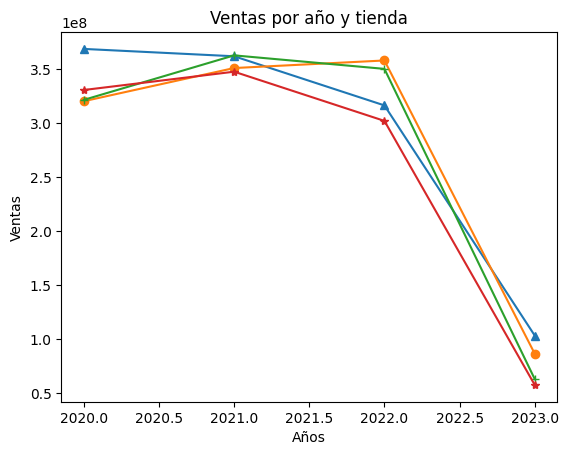

In [3]:
factu1 = tienda['Precio'].sum()
factu2 = tienda2['Precio'].sum()
factu3 = tienda3['Precio'].sum()
factu4 = tienda4['Precio'].sum()
np.set_printoptions(legacy='1.25')
tiendas_factut = [factu1,factu2,factu3,factu4]
#print(tiendas_factut)
listaf1 = []
listaf2 = []
listaf3 = []
listaf4 = []
listaaux = []
contador=0
for nomtie in tiendas_nombre:
  for anofact in lista_ano:
    condicion1 = tiendaf['ano_venta'] == anofact
    condicion2 = tiendaf['tienda_venta'] == nomtie
    cond_conjun = condicion1 & condicion2
    y = tiendaf.loc[ cond_conjun,'Precio'].sum()
    print(nomtie,anofact,y)
    if nomtie == 'tienda_1':
      listaf1.append(y)
    elif nomtie == 'tienda_2':
      listaf2.append(y)
    elif nomtie == 'tienda_3':
      listaf3.append(y)
    elif nomtie == 'tienda_4':
      listaf4.append(y)
print('')
print('La facturacion por año y totalizada de cada una de las sucursales ')
print('----------------------------------------------------------------- ')
print('')
print('')
print('facturacion Anualizada')
print('')
print('Tienda      ',lista_ano[0],'        ',lista_ano[1],'       ',lista_ano[2],'       ',lista_ano[3],'       Total Acumulado')
print(tiendas_nombre[0],'  ',listaf1,'  ',tiendas_factut[0])
print(tiendas_nombre[1],'  ',listaf2,'  ',tiendas_factut[1])
print(tiendas_nombre[2],'  ',listaf3,'  ',tiendas_factut[2])
print(tiendas_nombre[3],'  ',listaf4,'  ',tiendas_factut[3])
print('')
"""
grafico de ventas Anualizados de facturacion
"""

fig, ax = plt.subplots()

ax.plot(lista_ano, listaf1, marker = '^',label=tiendas_nombre[0])
ax.plot(lista_ano, listaf2, marker = 'o',label=tiendas_nombre[1])
ax.plot(lista_ano, listaf3, marker = '+',label=tiendas_nombre[2])
ax.plot(lista_ano, listaf4, marker = '*',label=tiendas_nombre[3])
# Añadir título al gráfico
plt.title('Ventas por año y tienda')

# Añadir etiquetas a los ejes
plt.xlabel("Años")
plt.ylabel('Ventas')
plt.show()

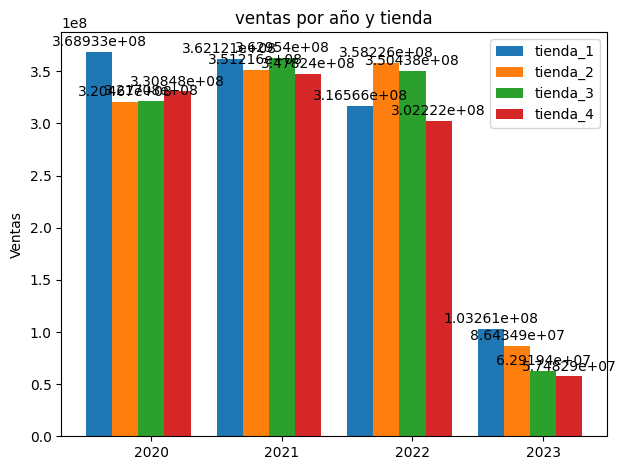

In [4]:
x = np.arange(len(lista_ano))
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, listaf1, width, label=tiendas_nombre[0])
rects2 = ax.bar(x - width, listaf2, width, label=tiendas_nombre[1])
rects3 = ax.bar(x , listaf3, width, label=tiendas_nombre[2])
rects4 = ax.bar(x + width, listaf4, width, label=tiendas_nombre[3])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ventas')
ax.set_title('ventas por año y tienda')
ax.set_xticks(x, lista_ano)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)
ax.bar_label(rects4, padding=2)

fig.tight_layout()
plt.show()



# 2. Ventas por categoría

In [29]:


Venta_tienda_categoria = tiendaf.groupby(['tienda_venta','Categoría del Producto'])['Producto'].count().reset_index()
#print(Venta_tienda_categoria)

occat = tiendaf.groupby(['Categoría del Producto']).size()
lista_cat = occat.index.tolist()
lista_cancat = occat.values.tolist()
#print(lista_cancat)
#print(lista_cat)


ventas_totalesCat = tiendaf.groupby(tiendaf['Categoría del Producto']).Producto.count()
print('Listado de las Categorias de Productos vendidos  en todas las tiendas')
print('---------------------------------------------------------------------')
print(ventas_totalesCat)
cat_mas_vendido = ventas_totalesCat.idxmax()
cat_menos_vendido = ventas_totalesCat.idxmin()
cantidadcat_mas_vendido = ventas_totalesCat.max()
cantidadcat_menos_vendido = ventas_totalesCat.min()
print ('mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm')
print('La Categoria  MAS vendido es ',cat_mas_vendido,'la cantidad vendida corresponde a ', cantidadcat_mas_vendido)
print ('mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm')
print('El producto MENOS vendido es ',cat_menos_vendido,'la cantidad vendida corresponde a ',cantidadcat_menos_vendido)


Listado de las Categorias de Productos vendidos  en todas las tiendas
---------------------------------------------------------------------
Categoría del Producto
Artículos para el hogar     730
Deportes y diversión       1113
Electrodomésticos          1149
Electrónicos               1772
Instrumentos musicales      753
Juguetes                   1290
Libros                      742
Muebles                    1886
Name: Producto, dtype: int64
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
La Categoria  MAS vendido es  Muebles la cantidad vendida corresponde a  1886
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
El producto MENOS vendido es  Artículos para el hogar la cantidad vendida corresponde a  730


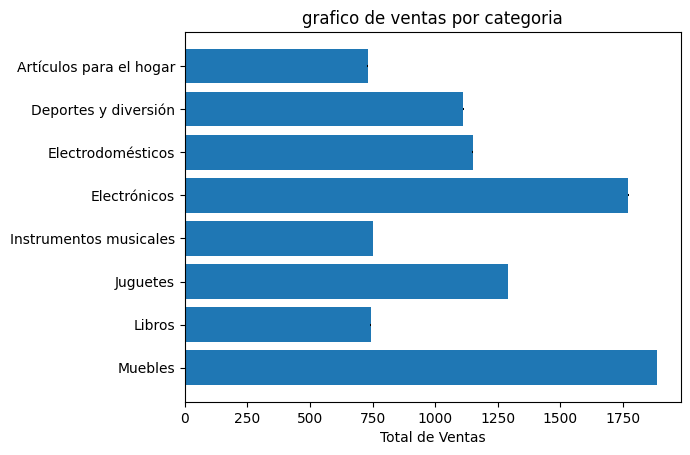

In [16]:


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(ventas_totalesCat))
#performance = 3 + 10 * np.random.rand(len(ventas_totalesCat))
error = np.random.rand(len(ventas_totalesCat))

ax.barh(y_pos, ventas_totalesCat, xerr=error, align='center')
ax.set_yticks(y_pos, labels=lista_cat)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total de Ventas')
#ax.set_xlabel('lista_cancat')
ax.set_title('grafico de ventas por categoria')

plt.show()

# 3. Calificación promedio de la tienda


In [6]:
#Calificación
occal = tiendaf.groupby(['tienda_venta','Calificación']).size()
occalt = tiendaf.groupby(['tienda_venta']).size()
lista_cal = occal.index.tolist()
lista_calt = occalt.values.tolist()

lista_cancal = occal.values.tolist()
print(lista_cancal)
print(lista_cal)
print(lista_calt)

for i in range(0,len(lista_calt)):
  prottt = 0
  for x in range(1,5):
    z = x + i*5
    prottt = prottt + lista_cancal[z]*x
  print('En la ',tiendas_nombre[i],'existieron un total de ',lista_calt[i],'otorgandole una Calificacion promedio de', round(prottt/lista_calt[i],2))


[319, 86, 218, 444, 1292, 273, 93, 209, 482, 1302, 297, 79, 193, 434, 1356, 310, 85, 210, 453, 1300]
[('tienda_1', 1), ('tienda_1', 2), ('tienda_1', 3), ('tienda_1', 4), ('tienda_1', 5), ('tienda_2', 1), ('tienda_2', 2), ('tienda_2', 3), ('tienda_2', 4), ('tienda_2', 5), ('tienda_3', 1), ('tienda_3', 2), ('tienda_3', 3), ('tienda_3', 4), ('tienda_3', 5), ('tienda_4', 1), ('tienda_4', 2), ('tienda_4', 3), ('tienda_4', 4), ('tienda_4', 5)]
[2359, 2359, 2359, 2358]
En la  tienda_1 existieron un total de  2359 otorgandole una Calificacion promedio de 2.98
En la  tienda_2 existieron un total de  2359 otorgandole una Calificacion promedio de 3.04
En la  tienda_3 existieron un total de  2359 otorgandole una Calificacion promedio de 3.05
En la  tienda_4 existieron un total de  2358 otorgandole una Calificacion promedio de 3.0


# 4. Productos más y menos vendidos

In [7]:
ventas_totales = tiendaf.groupby(tiendaf['Producto']).Producto.count()
print('Listado de los productos vendidos  en todas las tiendas')
print('--------------------------------------------------------')
print(ventas_totales)
producto_mas_vendido = ventas_totales.idxmax()
producto_menos_vendido = ventas_totales.idxmin()
cantidad_mas_vendido = ventas_totales.max()
cantidad_menos_vendido = ventas_totales.min()
print ('mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm')
print('El producto MAS vendido es ',producto_mas_vendido,'la cantidad vendida corresponde a ', cantidad_mas_vendido)
print ('mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm')
print('El producto MENOS vendido es ',producto_menos_vendido,'la cantidad vendida corresponde a ',cantidad_menos_vendido)



Listado de los productos vendidos  en todas las tiendas
--------------------------------------------------------
Producto
Ajedrez de madera              180
Armario                        197
Asistente virtual              167
Auriculares                    174
Auriculares con micrófono      158
Balón de baloncesto            197
Balón de voleibol              184
Batería                        203
Bicicleta                      196
Bloques de construcción        199
Cama box                       199
Cama king                      201
Carrito de control remoto      206
Celular ABXY                   157
Ciencia de datos con Python    166
Cubertería                     189
Cubo mágico 8x8                180
Cuerda para saltar             186
Dashboards con Power BI        181
Dinosaurio Rex                 175
Estufa                         187
Guitarra acústica              188
Guitarra eléctrica             165
Impresora                      188
Iniciando en programación      195
Iph

# 5. Envío promedio por tienda

In [46]:
np.set_printoptions(legacy='1.25')
#	Costo de envío
# promedio tienda
envio1 = tienda['Costo de envío'].sum()
envio2 = tienda2['Costo de envío'].sum()
envio3 = tienda3['Costo de envío'].sum()
envio4 = tienda4['Costo de envío'].sum()

Cant_envio1 = tienda['Costo de envío'].count()
Cant_envio2 = tienda2['Costo de envío'].count()
Cant_envio3 = tienda3['Costo de envío'].count()
Cant_envio4 = tienda4['Costo de envío'].count()

print('')
print('Listado Promedio de Costos de Envio anuales referidos al total de años  ')
print('---------------------------------------------------------------------- ')
print('')
print('Tienda      Promedio de Envio')
print(tiendas_nombre[0],'  ',round(envio1/Cant_envio1,2))
print(tiendas_nombre[1],'  ',round(envio2/Cant_envio2,2))
print(tiendas_nombre[2],'  ',round(envio3/Cant_envio3,2))
print(tiendas_nombre[3],'  ',round(envio4/Cant_envio4,2))

tiendas_envio = [envio1,envio2,envio3,envio4]
#print(tiendas_envio)
listae1 = []
listae2 = []
listae3 = []
listae4 = []
contador=0
for nomtie in tiendas_nombre:
  for anofact in lista_ano:
    condicion1 = tiendaf['ano_venta'] == anofact
    condicion2 = tiendaf['tienda_venta'] == nomtie
    cond_conjun = condicion1 & condicion2
    y = tiendaf.loc[ cond_conjun,'Costo de envío'].sum()
 #   print(nomtie,anofact,y)
    if nomtie == 'tienda_1':
      listae1.append(y)
    elif nomtie == 'tienda_2':
      listae2.append(y)
    elif nomtie == 'tienda_3':
      listae3.append(y)
    elif nomtie == 'tienda_4':
      listae4.append(y)
print('')
print('Los costos de envio año y totalizada de cada una de las sucursales ')
print('----------------------------------------------------------------- ')
print('')
print('')
print('costos de envio  Anualizada')
print('')
print('Tienda      ',lista_ano[0],'        ',lista_ano[1],'       ',lista_ano[2],'       ',lista_ano[3],'       Total Acumulado')
print(tiendas_nombre[0],'  ',listae1,'  ',tiendas_envio[0])
print(tiendas_nombre[1],'  ',listae2,'  ',tiendas_envio[1])
print(tiendas_nombre[2],'  ',listae3,'  ',tiendas_envio[2])
print(tiendas_nombre[3],'  ',listae4,'  ',tiendas_envio[3])
print('')
listapano =[]
# envio promedio por año referenciado a la misma tienda
listapro1 =[]
listapro2 =[]
listapro3 =[]
listapro4 =[]

for nomtie in tiendas_nombre:
  for conta in  range(0, len(lista_ano)):

    if nomtie == 'tienda_1':
      y =round(listae1[conta]/tiendas_envio[0]* 100,2)
      listapro1.append(y)
    elif nomtie == 'tienda_2':
      y =round(listae2[conta]/tiendas_envio[1]* 100,2)
      listapro2.append(y)
    elif nomtie == 'tienda_3':
      y =round(listae3[conta]/tiendas_envio[2]* 100,2)
      listapro3.append(y)
    elif nomtie == 'tienda_4':
      y =round(listae4[conta]/tiendas_envio[3]* 100,2)
      listapro4.append(y)

print('')
print('listado de porcentajes anuales referidos al total de años  ')
print('----------------------------------------------------------------- ')
print('')
print('')
print('Tienda     ',lista_ano[0],'  ',lista_ano[1],' ',lista_ano[2],' ',lista_ano[3])
print(tiendas_nombre[0],'  ',listapro1)
print(tiendas_nombre[0],'  ',listapro2)
print(tiendas_nombre[0],'  ',listapro3)
print(tiendas_nombre[0],'  ',listapro4)



Listado Promedio de Costos de Envio anuales referidos al total de años  
---------------------------------------------------------------------- 

Tienda      Promedio de Envio
tienda_1    26018.61
tienda_2    25216.24
tienda_3    24805.68
tienda_4    23459.46

Los costos de envio año y totalizada de cada una de las sucursales 
----------------------------------------------------------------- 


costos de envio  Anualizada

Tienda       2020          2021         2022         2023        Total Acumulado
tienda_1    [19746200.0, 19219700.0, 16862300.0, 5549700.0]    61377900.0
tienda_2    [17167500.0, 18618500.0, 19094700.0, 4604400.0]    59485100.0
tienda_3    [17067900.0, 19384800.0, 18728300.0, 3335600.0]    58516600.0
tienda_4    [17528600.0, 18598200.0, 16156400.0, 3034200.0]    55317400.0


listado de porcentajes anuales referidos al total de años  
----------------------------------------------------------------- 


Tienda      2020    2021   2022   2023
tienda_1    [32.17, 31.31

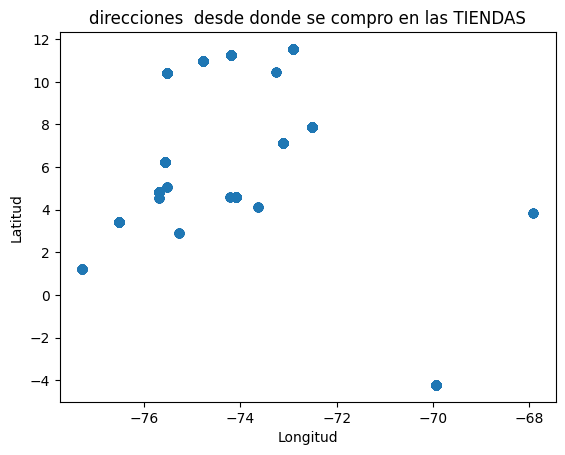

'\n# Seed for reproducibility\n#np.random.seed(2)\n\n# Data\n\n# Labels\nxlabs = tienda[\'lat\']\nylabs = tienda[\'lon\']\n         \n# Heat map\nfig, ax = plt.subplots()\nax.imshow(tienda[lat])\n\n# Add the labels\nax.set_xticks(np.arange(len(xlabs)), labels = xlabs)\nax.set_yticks(np.arange(len(ylabs)), labels = ylabs)\n\n# Rotate the labels of the X-axis\nplt.setp(ax.get_xticklabels(), rotation = 40,\n         ha = "right", rotation_mode = "anchor")\nplt.show() \n'

In [40]:
# tienda _ 1  dispersion   asociado a la latitud y Longitud
plt.scatter(tiendaf['lon'], tiendaf['lat']);
plt.xlabel('Longitud');
plt.ylabel('Latitud');
plt.title('direcciones  desde donde se compro en las TIENDAS');
plt.show();


"""
# Seed for reproducibility
#np.random.seed(2)

# Data

# Labels
xlabs = tienda['lat']
ylabs = tienda['lon']

# Heat map
fig, ax = plt.subplots()
ax.imshow(tienda[lat])

# Add the labels
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Rotate the labels of the X-axis
plt.setp(ax.get_xticklabels(), rotation = 40,
         ha = "right", rotation_mode = "anchor")
plt.show()
"""